In [41]:
import itertools
import math
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [68]:
def plot_route(route, coords, orders, max_capacity=1000):
    fig, ax = plt.subplots(ncols=1, figsize=(4,4))

    ax.set(xlabel="X", ylabel="Y", xlim=(0,100), ylim=(0,100))
    ax.scatter(coords[:,0], coords[:,1], marker="o", s=15, c=orders, cmap="inferno_r")
    ax.plot(coords[0][0], coords[0][1], ls="", marker="o", ms=10, c="red")
    ax.grid()

    capacity = max_capacity - orders[route[0]]
    ax.annotate("", xytext=coords[0], xy=coords[route[0]], arrowprops=dict(arrowstyle="->"))
    
    for i, f in zip(route, route[1:]):
        if capacity < orders[f]:
            capacity = max_capacity
            ax.annotate("", xytext=coords[i], xy=coords[0], arrowprops=dict(arrowstyle="->"))
            ax.annotate("", xytext=coords[0], xy=coords[f], arrowprops=dict(arrowstyle="->"))
            # print("Ups, go back")
        else:
            ax.annotate("", xytext=coords[i], xy=coords[f], arrowprops=dict(arrowstyle="->"))

    ax.annotate("", xytext=coords[route[-1]], xy=coords[0], arrowprops=dict(arrowstyle="->"))
    

In [69]:
permutations=list(itertools.permutations(range(1,11)))

In [70]:
dist_central = np.loadtxt("CustDist_WHCentral.csv", skiprows=1, delimiter=",")[:,1:]
xy_central   = np.loadtxt("CustXY_WHCentral.csv", skiprows=1, delimiter=",")[:,1:].T
orders       = np.loadtxt("CustOrd.csv", skiprows=1, delimiter=",")[:,1]

dist_corner  = np.loadtxt("CustDist_WHCorner.csv", skiprows=1, delimiter=",")[:,1:]
xy_corner    = np.loadtxt("CustXY_WHCorner.csv", skiprows=1, delimiter=",")[:,1:].T

In [71]:
def evaluate(individual, distances, orders, max_capacity=1000):
    
    dist = distances[0, individual[0]]
    capacity = max_capacity - orders[individual[0]]
    
    for i, f in zip(individual[:-1], individual[1:]):
        if capacity < orders[f]:
            dist += distances[i][0]
            capacity = max_capacity
            dist += distances[0][f]
            # print("Ups, go back")
        else:
            dist += distances[i][f]
        
        capacity -= orders[f]
        # print(f"Went from {i} to {f} and capacity is now {capacity} and dist is {dist}")        
    dist+=distances[0,individual[-1]]
    return (dist,)

In [ ]:
def evaluateMO(individual, distances, orders, max_capacity=1000):
    
    dist = distances[0, individual[0]]
    cost = max_capacity*dist
    capacity = max_capacity - orders[individual[0]]
    
    for i, f in zip(individual[:-1], individual[1:]):
        if capacity < orders[f]:
            cost += capacity*distances[i][0]
            dist += distances[i][0]
            capacity = max_capacity
            cost += capacity*distances[0][f]
            dist += distances[0][f]
            # print("Ups, go back")
        else:
            cost+=capacity*distances[i][f]
            dist += distances[i][f]
        
        capacity -= orders[f]
        # print(f"Went from {i} to {f} and capacity is now {capacity} and dist is {dist}")        
    cost+=capacity*distances[0,individual[-1]]
    dist+=distances[0,individual[-1]]
    return (dist,cost)

## Exhaustive search: best for 10 customers, Central Base

In [72]:
mini1=1000
best1=permutations[0]
fitness1=[]
for perm in permutations:
    calc=evaluate(perm,dist_central[:11],orders[:11],max_capacity=1000)[0]
    fitness1+=[calc]
    if calc<mini1:
        mini1=calc
        best1=perm

In [74]:
fitness1.sort()

(array([ 2.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  0.,  6.,  2.,  8.,
         0.,  6., 10., 10., 16., 14., 18.]),
 array([306. , 307.7, 309.4, 311.1, 312.8, 314.5, 316.2, 317.9, 319.6,
        321.3, 323. , 324.7, 326.4, 328.1, 329.8, 331.5, 333.2, 334.9,
        336.6, 338.3, 340. ]),
 <BarContainer object of 20 artists>)

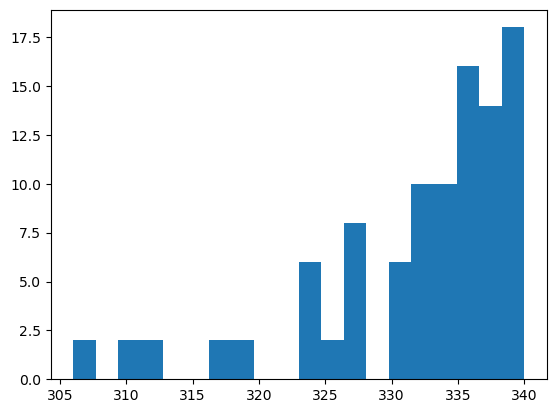

In [75]:
plt.hist(fitness1[:100],bins=20)

In [76]:
mini1

306.0

In [77]:
best1

(4, 7, 5, 8, 6, 9, 3, 2, 1, 10)

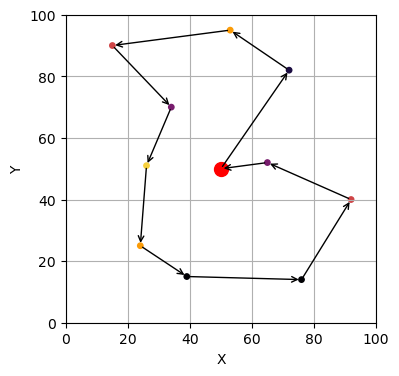

In [84]:
plot_route(best1, xy_central.T[:11], orders[:11])

## Exhaustive search: best for 10 customers, corner base

In [78]:
mini2=1000
best2=permutations[0]
fitness2=[]
for perm in permutations:
    calc=evaluate(perm,dist_corner[:11],orders[:11],max_capacity=1000)[0]
    fitness2+=[calc]
    if calc<mini2:
        mini2=calc
        best2=perm

In [79]:
fitness2.sort()

In [80]:
mini2

342.0

In [81]:
best2

(3, 2, 1, 10, 4, 7, 5, 8, 6, 9)

(array([ 2.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  2.,  4.,  2.,
        10.,  4., 12., 14.,  8., 14., 20.]),
 array([342.  , 344.45, 346.9 , 349.35, 351.8 , 354.25, 356.7 , 359.15,
        361.6 , 364.05, 366.5 , 368.95, 371.4 , 373.85, 376.3 , 378.75,
        381.2 , 383.65, 386.1 , 388.55, 391.  ]),
 <BarContainer object of 20 artists>)

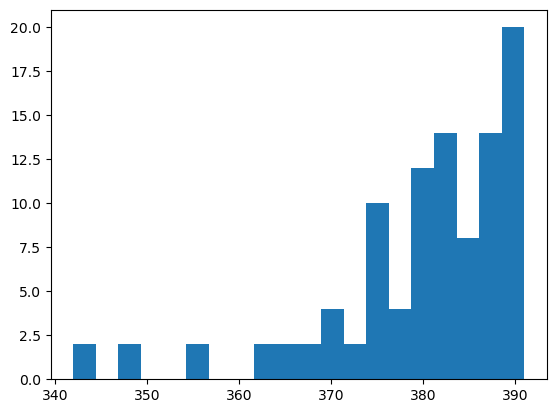

In [82]:
plt.hist(fitness2[:100],bins=20)

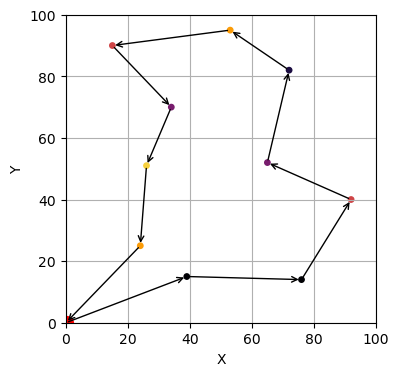

In [83]:
plot_route(best2, xy_corner.T[:11], orders[:11])